In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from utility import get_keyword_per_state

In [2]:
data = pd.read_csv('~/Datasets/UFO/nuforc_reports.csv')
data = data.drop(['report_link','stats'],axis=1)

In [3]:
data.dropna(subset='text',inplace=True)

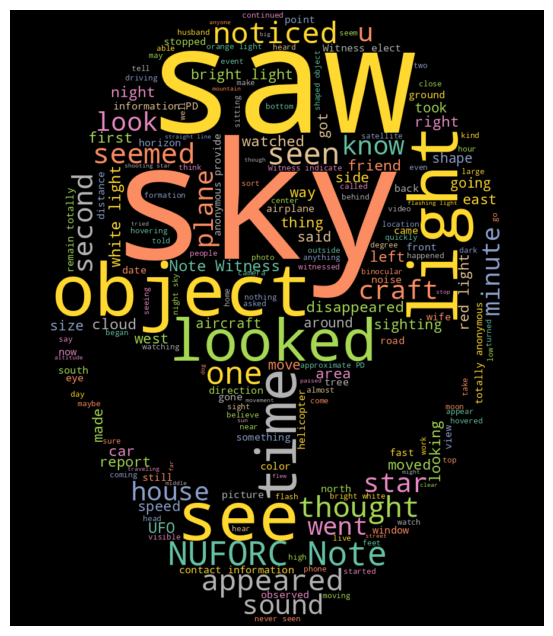

In [4]:
text_data = ' '.join(data['text'])

mask = np.array(Image.open("download.jpg"))

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=1000, background_color='black', colormap='Set2', mask=mask).generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [5]:
from transformers import (
    TokenClassificationPipeline,
    AutoModelForTokenClassification,
    AutoTokenizer,
)
from transformers.pipelines import AggregationStrategy
import numpy as np

# Define keyphrase extraction pipeline
class KeyphraseExtractionPipeline(TokenClassificationPipeline):
    def __init__(self, model, *args, **kwargs):
        super().__init__(
            model=AutoModelForTokenClassification.from_pretrained(model),
            tokenizer=AutoTokenizer.from_pretrained(model),
            *args,
            **kwargs
        )

    def postprocess(self, all_outputs):
        results = super().postprocess(
            all_outputs=all_outputs,
            aggregation_strategy=AggregationStrategy.FIRST,
        )
        return np.unique([result.get("word").strip() for result in results])

In [6]:
# Load pipeline
model_name = "ml6team/keyphrase-extraction-distilbert-inspec"
extractor = KeyphraseExtractionPipeline(model=model_name)

# Inference
text_data = text_data.replace("\n", " ")

keyphrases = extractor(text_data)

print(keyphrases)

['airliner' 'bright lights' 'contact information' 'flight path'
 'helicopters' 'nighttime sighting' 'orange lights'
 'steady flashing object' 'train' 'ufo']


In [18]:
get_keyword_per_state('CA',data,extractor)

['air craft',
 'apparent sighting',
 'bright light',
 'hazy blue lights',
 'hwy',
 'little league softball',
 'lookout',
 'mountain range',
 'national forest',
 'nuforc',
 'roadhouse',
 'stealth bomber',
 'tictac shaped ufo',
 'underwater base',
 'v shaped glowing object']

In [19]:
get_keyword_per_state('FL',data,extractor)

['bed stand',
 'black eyes',
 'booming thunder',
 'central florida',
 'hurricanes',
 'power rangers',
 'silent black object',
 'thunder']